<h1><center>DS420 - Lec17: Clustering Exercise (Part II: Data Analytics)

## Background

A famous politician who's running for an election needs your help - his laptop has been hacked! Luckily their forensic experts have grabbed valuable data about the hacks, including information like session time, locations, wpm typing speed, etc. The forensic experts relate to you what they have been able to figure out so far, they have been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


There are 3 potential hackers that perpetrated the attack. The experts are certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic experts know that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

## Section 1: Setup Environment and Load the Data

#### Setup the spark path for Jupyter notebook

In [1]:
import findspark
findspark.init('/opt/spark') # Path to my spark installation

#### Create a Spark Session with the following code. Modify the appName with your own name. 

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("kmeans_moynihan_p2")\
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/lec17.hacker") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/lec17.hackerAnalysis")\
    .config('spark.jars.packages','org.mongodb.spark:mongo-spark-connector_2.12:3.0.0')\
    .getOrCreate()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/opt/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1212, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33607)
Traceback (most recent call last):
  File "/home/lip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33607)
Traceback (most recent call last):
  File "/home/lip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f7e50c7997bf>", line 4, in <module>
    .config('spark.jars.packages','org.mongodb.spark:mongo-spark-connector_2.12:3.0.0')\
  File "/opt/spark/python/pyspark/sql/session.py", line 186, in getOrCreate
    sc = SparkContext.getOrCreate(sparkConf)
  File "/opt/spark/python/pyspark/context.py", line 376, in getOrCreate
    SparkContext(conf=conf or SparkConf())
  File "/opt/spark/python/pyspark/context.py", line 136, in __init__
    conf, jsc, profiler_cls)
  File "/opt/spark/python/pyspark/context.py", line 198, in _do_init
    self._jsc = jsc or self._initialize_context(self._conf._jconf)
  File "/opt/spark/python/pyspark/context.py", line 315, in _initialize_co

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33607)
Traceback (most recent call last):
  File "/home/lip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f7e50c7997bf>", line 4, in <module>
    .config('spark.jars.packages','org.mongodb.spark:mongo-spark-connector_2.12:3.0.0')\
  File "/opt/spark/python/pyspark/sql/session.py", line 186, in getOrCreate
    sc = SparkContext.getOrCreate(sparkConf)
  File "/opt/spark/python/pyspark/context.py", line 376, in getOrCreate
    SparkContext(conf=conf or SparkConf())
  File "/opt/spark/python/pyspark/context.py", line 136, in __init__
    conf, jsc, profiler_cls)
  File "/opt/spark/python/pyspark/context.py", line 198, in _do_init
    self._jsc = jsc or self._initialize_context(self._conf._jconf)
  File "/opt/spark/python/pyspark/context.py", line 315, in _initialize_co

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33607)
Traceback (most recent call last):
  File "/home/lip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f7e50c7997bf>", line 4, in <module>
    .config('spark.jars.packages','org.mongodb.spark:mongo-spark-connector_2.12:3.0.0')\
  File "/opt/spark/python/pyspark/sql/session.py", line 186, in getOrCreate
    sc = SparkContext.getOrCreate(sparkConf)
  File "/opt/spark/python/pyspark/context.py", line 376, in getOrCreate
    SparkContext(conf=conf or SparkConf())
  File "/opt/spark/python/pyspark/context.py", line 136, in __init__
    conf, jsc, profiler_cls)
  File "/opt/spark/python/pyspark/context.py", line 198, in _do_init
    self._jsc = jsc or self._initialize_context(self._conf._jconf)
  File "/opt/spark/python/pyspark/context.py", line 315, in _initialize_co

Py4JError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext

#### Now load the data from the MongoDB: `lec17.hacker`

In [4]:
# Read it back from MongoDB into a new Dataframe
df = spark.read\
    .format("com.mongodb.spark.sql.DefaultSource")\
    .option("uri","mongodb://127.0.0.1/lec17.hacker")\
    .load()

NameError: name 'spark' is not defined

In [5]:
df.show(5)

NameError: name 'df' is not defined

## Section 2: Data Queries

#### Using SparkSQL to find the users who can type faster than 74 words per minute.

In [6]:
df.createOrReplaceTempView("users")


In [7]:
sqlDF = spark.sql('SELECT * FROM users where WPM_Typing_Speed > 74')


sqlDF.show()

+-----------------+---------------+--------------------+---------------+-----------------+-----------------------+----------------+--------------------+
|Bytes Transferred|Kali_Trace_Used|            Location|Pages_Corrupted|Servers_Corrupted|Session_Connection_Time|WPM_Typing_Speed|                 _id|
+-----------------+---------------+--------------------+---------------+-----------------+-----------------------+----------------+--------------------+
|           364.88|              0|         Philippines|            7.0|             3.52|                   33.0|           74.24|[624105b0fc597801...|
|            89.49|              1|Holy See (Vatican...|            8.0|              1.8|                   16.0|           74.92|[624105b0fc597801...|
|           635.81|              0|            Slovenia|            7.0|             3.43|                   18.0|           74.01|[624105b0fc597801...|
|           253.39|              0|Saint Vincent and...|            8.0|          

#### Export your query results to a new database on MongoDB: `lec17.hackerAnalysis`

In [8]:
# Write insight into MongoDB
sqlDF.write\
    .format("com.mongodb.spark.sql.DefaultSource")\
    .option("uri","mongodb://127.0.0.1/lec17.hackerAnalysis")\
    .mode('append')\
    .save()

## Section 3: Data Preparation

#### Show the basic statistics to all columns and justify why you need to standardize the data.

In [9]:

df.describe().show()


+-------+------------------+------------------+-----------+------------------+-----------------+-----------------------+------------------+
|summary| Bytes Transferred|   Kali_Trace_Used|   Location|   Pages_Corrupted|Servers_Corrupted|Session_Connection_Time|  WPM_Typing_Speed|
+-------+------------------+------------------+-----------+------------------+-----------------+-----------------------+------------------+
|  count|               334|               334|        334|               334|              334|                    334|               334|
|   mean| 607.2452694610777|0.5119760479041916|       null|10.838323353293413|5.258502994011977|     30.008982035928145|57.342395209580864|
| stddev|286.33593163576757|0.5006065264451406|       null|  3.06352633036022| 2.30190693339697|     14.088200614636158| 13.41106336843464|
|    min|              10.0|                 0|Afghanistan|               6.0|              1.0|                    1.0|              40.0|
|    max|           

#### Display all columns in the DataFrame.

In [10]:


df.columns

['Bytes Transferred',
 'Kali_Trace_Used',
 'Location',
 'Pages_Corrupted',
 'Servers_Corrupted',
 'Session_Connection_Time',
 'WPM_Typing_Speed',
 '_id']

#### Vectorize all features

In [11]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [12]:
feat_cols = ['Bytes Transferred',
 'Kali_Trace_Used',
 'Pages_Corrupted',
 'Servers_Corrupted',
 'Session_Connection_Time',
 'WPM_Typing_Speed']



In [13]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol = 'features')



In [14]:
final_data = vec_assembler.transform(df)



#### Standardize the vector feature

In [15]:
from pyspark.ml.feature import StandardScaler

In [16]:
scaler = StandardScaler(inoutCol='features',
                        outputCol='scaledFeatures',
                        withMean=True, withStd=True)



In [17]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)



In [18]:
# Standardize each feature to have unit standard deviation and zero mean
cluster_final_data = scalerModel.transform(final_data)



## Section 4: Data Modeling and Evaluation

#### Time to find out whether its 2 or 3 hackers using KMeans!

In [19]:
# Import KMeans

import pyspark.ml.clustering import KMeans


In [20]:
# Create two separate models for k=3 and k=2

kmeans3 = KMeans(featCol='scaledFeatures', k=3, seed=101)

kmeans2 =  KMeans(featCol='scaledFeatures', k=2, seed=101)


In [21]:
# Train the two models

model_k3 = kmeans3.fit(cluster_final_data)

model_k2 = kmeans2.fit(cluster_final_data)



In [22]:
# Create an evaluator object for the clutering
# Evaluate clustering with Silhouette score

from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(featuresCol='scaledFeatures')



In [23]:
# Use the trained models to make predictions

pred_k3 = model_k3.transform(cluster_final_data)     #this is the part where u could use your testing data

pred_k2 = model_k2.transform(cluster_final_data)  


In [24]:
# Evaluate the predictions with silhouette score

silhouette_k3 = evaluator.evaluate(pred_k3)

silhouette_k2 = evaluator.evaluate(pred_k2)


In [25]:
# Print the results

print("With K=3")
print("Silhouette coefficient = " + str(silhouette_k3))
print('--'*30)
print("With K=2")
print("Silhouette coefficient = " + str(silhouette_k2))

With K=3
Silhouette coefficient = 0.30412315937808737
------------------------------------------------------------
With K=2
Silhouette coefficient = 0.6683623593283755


#### We see when k=2, the score is much higher. This means using two groups describes the intrinsic data pattern better.

#### We could however continue the analysis by seeing the "elbow curve" on a larger range of k values. 

In [26]:

coeff = []
for i in range(2:11):
    kmeans = KMeans[featureCol='scaledFeatures', k=i, seed = 101]
    model = kmeans.fit(cluster_final_data)
    pred = model.transform(cluster_final_data)
    coeff.append(evaluator.evaluate(pred))
    





Text(0, 0.5, 'Silhouette Score')

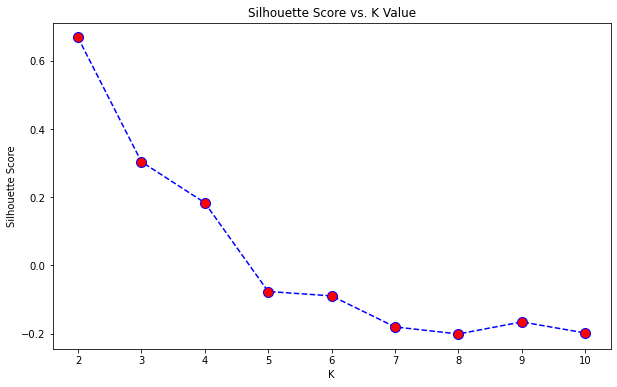

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(2,11), coeff, color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10



)
plt.title('Silhouette Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

#### Nothing definitive can be said with the above, but wait! The last key fact that the engineer mentioned was that the attacks should be evenly numbered between the hackers! Let's check with the transform and prediction columns that result from this! Congratulations if you made this connection, it was quite tricky given what we've covered!

In [ ]:
pred_k3.show()

In [28]:
pred_k3.groupby('prediction').count().show()



+----------+-----+
|prediction|count|
+----------+-----+
|         1|  167|
|         2|   79|
|         0|   88|
+----------+-----+



In [29]:
pred_k2.groupby('prediction').count().show()




+----------+-----+
|prediction|count|
+----------+-----+
|         1|  167|
|         0|  167|
+----------+-----+



________

#### Bingo! It was 2 hackers, in fact, our clustering algorithm created two equally sized clusters with K=2, no way that is a coincidence!

# Great Job!